# Star forming

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import illustris_python as il

In [89]:
def plot_max_points(ax, data, weights, color, label):
    """
    grafica un punto por cada barra en la posicion del centro del bin y la altura correspondiente,
    y une los puntos con lineas rectas.
    """
    hist, bin_edges = np.histogram(data, bins=n_bins, weights=weights)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # centros de los bins
    ax.plot(bin_centers, hist, color=color, label=label, marker='o', linestyle='-')  # une puntos con lineas

In [4]:
basePath = '/home/tnguser/sims.TNG/TNG100-1/output'
fields = ['Group_R_Crit200', 'GroupSFR', 'GroupMassType']
halos = il.groupcat.loadHalos(basePath, 99, fields=fields)

In [5]:
fields = ['SubhaloMass','SubhaloSFRinRad','SubhaloSFR' ,'SubhaloStellarPhotometrics', 'SubhaloMassType', 'SubhaloGrNr']
subhalos = il.groupcat.loadSubhalos(basePath, 99, fields=fields)

In [13]:
h = 0.6774

In [7]:
df = pd.read_pickle('../generate_catalog/group_number_cat.pkl')

In [10]:
F05r200 = df['05FossilR200']
NF05r200 = df['05NFossilR200']

In [11]:
halos['GroupMassType'][F05r200,4]

array([747.9899  , 465.72235 , 334.2555  , 335.36932 , 321.4376  ,
       293.62885 , 251.3057  , 237.3432  , 135.02693 , 131.1882  ,
       206.85689 , 154.06927 , 128.55511 , 146.72746 , 115.67074 ,
       151.75215 , 151.25688 ,  82.80259 , 114.747154,  84.619576,
       102.15903 , 106.64192 , 109.52954 , 101.41716 , 123.35533 ,
       100.81771 ,  88.5638  ,  89.85959 ,  98.86231 ,  95.41885 ,
        66.67466 ,  60.822155,  79.763535,  58.423813,  72.13162 ,
        49.996063,  58.685287,  62.985115,  81.17401 ,  74.64714 ,
        71.00924 ,  63.134293,  60.680134,  57.730545,  53.6938  ,
        50.11242 ,  50.44547 ,  58.5172  ,  45.001114,  40.57365 ,
        41.407906,  40.309994,  47.158695,  44.091503,  41.475574,
        41.01986 ,  40.40372 ,  41.59321 ,  49.993397,  35.449917,
        35.80867 ,  44.629482,  30.490967,  34.268517,  36.158276,
        32.13597 ,  33.554733,  38.5377  ,  40.692078,  20.450954,
        26.424429,  36.349606,  31.167645,  32.7648  ,  30.269

In [14]:
sstarforming = []
Nsstarforming = []
stellarmass = []
Nstellarmass = []

for i in (range(len(F05r200))):
    a = halos['GroupSFR'][F05r200[i]]/((halos['GroupMassType'][F05r200[i],4]/h)*10**10)
    sstarforming.append(a)

for i in (range(len(NF05r200))):
    b = halos['GroupSFR'][NF05r200[i]]/((halos['GroupMassType'][NF05r200[i],4]/h)*10**10)
    Nsstarforming.append(b) 

In [15]:
sstarforming = np.log10(sstarforming)
Nsstarforming = np.log10(Nsstarforming)

In [16]:
mediansSFR = np.median(sstarforming)
nmedianNsSFR = np.median(Nsstarforming)

In [17]:
print(f'fossil: {mediansSFR} \nno fossil:{nmedianNsSFR}')

fossil: -10.85174518659301 
no fossil:-10.747951267377541


In [18]:
weight_fossil = np.ones_like(sstarforming)/float(len(F05r200))
weight_nonfossil = np.ones_like(Nsstarforming)/float(len(NF05r200))
bins = np.arange(0,1,0.05)

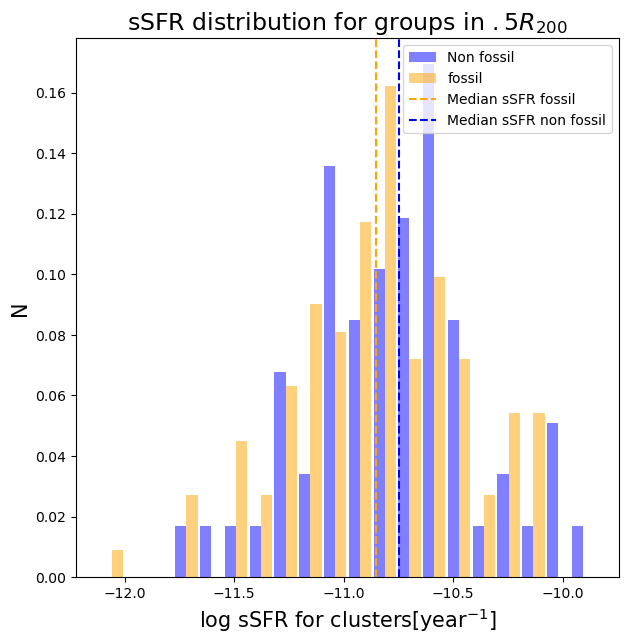

In [19]:
plt.figure(figsize=(7,7))
plt.title('sSFR distribution for groups in $.5R_{200}$', fontsize=17)

plt.ylabel('N', fontsize=15)
plt.xlabel('log sSFR for clusters[year$^{-1}$]',fontsize=15)
plt.hist([Nsstarforming, sstarforming], bins=20, color = ['blue', 'orange'], rwidth=0.9, alpha=0.5, label=['Non fossil', 'fossil'], weights = [weight_nonfossil, weight_fossil])

#plt.hist(Nfracblue, bins=bins, color = 'blue', rwidth=0.9, alpha=0.5, label='Non fossil', density=True, stacked=True)
#plt.hist(fracblue, bins=bins, color = 'orange', rwidth=0.9, alpha=0.5, label='Fossil', density=True, stacked=True)
plt.axvline(mediansSFR, color='orange', linestyle = '--', label='Median sSFR fossil')
plt.axvline(nmedianNsSFR, color='blue', linestyle = '--', label='Median sSFR non fossil')
plt.legend(loc='upper right', fontsize=10)

#plt.axvline(linea2, color='black')
#plt.axvline(quart21, color='black', linestyle = '--')
#plt.axvline(quart22, color='black', linestyle = '--')

plt.savefig('/home/tnguser/taller/graficosnuevos/ssfr05R200.jpg')

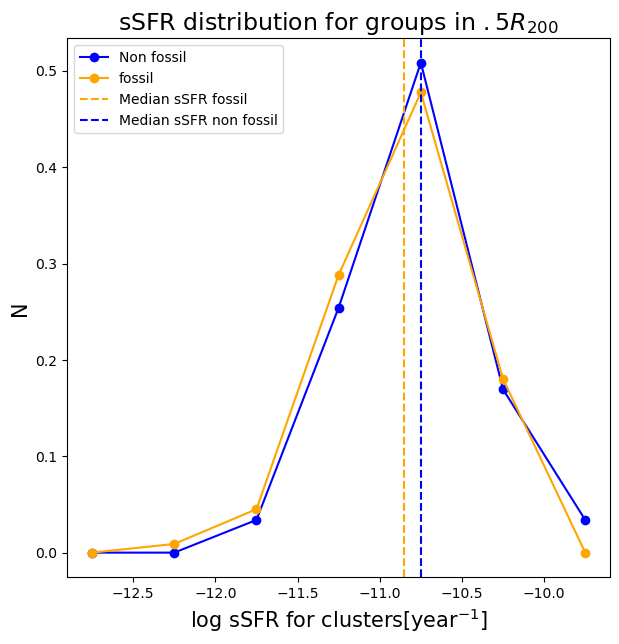

In [95]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
   
ax.set_title('sSFR distribution for groups in $.5R_{200}$', fontsize=17)
    
ax.set_ylabel('N', fontsize=15)
ax.set_xlabel('log sSFR for clusters[year$^{-1}$]',fontsize=15)

n_bins = np.arange(-13, -9, 0.5)


plot_max_points(ax, Nsstarforming,
                weights = weight_nonfossil,
                color ='blue', 
                label='Non fossil')

plot_max_points(ax, sstarforming, 
                weights = weight_fossil,
                color = 'orange', 
                label='fossil')


#plt.hist(Nfracblue, bins=bins, color = 'blue', rwidth=0.9, alpha=0.5, label='Non fossil', density=True, stacked=True)
#plt.hist(fracblue, bins=bins, color = 'orange', rwidth=0.9, alpha=0.5, label='Fossil', density=True, stacked=True)
plt.axvline(mediansSFR, color='orange', linestyle = '--', label='Median sSFR fossil')
plt.axvline(nmedianNsSFR, color='blue', linestyle = '--', label='Median sSFR non fossil')
plt.legend(loc='upper left', fontsize=10)

#plt.axvline(linea2, color='black')
#plt.axvline(quart21, color='black', linestyle = '--')
#plt.axvline(quart22, color='black', linestyle = '--')

plt.savefig('/home/tnguser/taller/graficosnuevos/ssfr05R200.jpg')

In [96]:
init1 = min(Nsstarforming)
maxim1 = max(Nsstarforming)
init2 = min(sstarforming)
maxim2 = max(sstarforming)

In [97]:
bins1_sfr05 = np.linspace(init2, maxim1, num=len(Nsstarforming))
bins2_sfr05 = np.linspace(init2, maxim1,num=len(sstarforming))

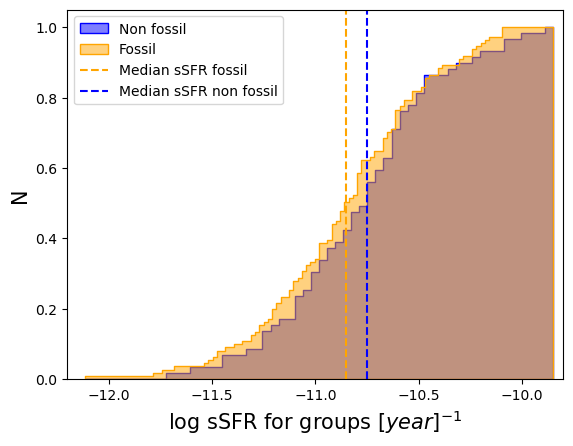

In [98]:
sns.histplot(Nsstarforming, kde=False, label='Non fossil', 
             color='blue', element='step', cumulative=True, 
             bins=bins1_sfr05, stat='density', alpha=0.5)
sns.histplot(sstarforming, kde=False, label='Fossil', 
             color='orange', element='step', cumulative=True, 
             bins=bins2_sfr05, stat='density', alpha=0.5)


#plt.title('sSFR per group for $.5R_{200}$ sample', fontsize=17)
plt.ylabel('N', fontsize=15)
plt.xlabel('log sSFR for groups $[year]^{-1}$', fontsize=15)
plt.xlim(-12.2, -9.8)

plt.axvline(mediansSFR, color='orange', linestyle = '--', label='Median sSFR fossil')
plt.axvline(nmedianNsSFR, color='blue', linestyle = '--', label='Median sSFR non fossil')

plt.legend(loc='upper left', fontsize=10)


plt.savefig('/home/tnguser/taller/graficosnuevos/ssfr05R200_KDE.jpg', dpi=150)

plt.show()

In [99]:
from scipy.stats import kstest
from scipy.stats import ks_2samp

In [100]:
print(ks_2samp(sstarforming, Nsstarforming))
print(ks_2samp(sstarforming, Nsstarforming, alternative='less'))

KstestResult(statistic=0.13009619789280807, pvalue=0.4816777129315135, statistic_location=-10.763392939343138, statistic_sign=1)
KstestResult(statistic=0.008550923805161093, pvalue=0.9870386307630612, statistic_location=-10.454391180346287, statistic_sign=-1)


In [101]:
stellar_mass = np.log10((subhalos['SubhaloMassType'][:,4])/h) +10
gals = np.nonzero(stellar_mass > 9.5)[0]

/tmp/ipykernel_1012/3601298107.py:1: RuntimeWarning: divide by zero encountered in log10
  stellar_mass = np.log10((subhalos['SubhaloMassType'][:,4])/h) +10


In [102]:
sstarforming_each = []
Nsstarforming_each = []

for i in range(len(F05r200)):
    sstarforming_each.append([])
for i in range(len(NF05r200)):
    Nsstarforming_each.append([])

for i in range(len(F05r200)):
    group = np.nonzero(subhalos['SubhaloGrNr'][gals] == F05r200[i])[0] #aqui con el gals se ahce uso solo de las galaxias con al menos 1000 particulas
    #print(group)
    for subhalo in range(len(group)):
        a = (h/10**10)*(subhalos['SubhaloSFR'][group[subhalo]]/subhalos['SubhaloMassType'][group[subhalo],4])
        sstarforming_each[i].append(a)

for i in range(len(NF05r200)):
    group = np.nonzero(subhalos['SubhaloGrNr'][gals] == NF05r200[i])[0] #aqui con el gals se ahce uso solo de las galaxias con al menos 1000 particulas
    #print(group)
    for subhalo in range(len(group)):
        b = (h/10**10)*(subhalos['SubhaloSFR'][group[subhalo]]/subhalos['SubhaloMassType'][group[subhalo],4])
        Nsstarforming_each[i].append(b)

/tmp/ipykernel_1012/1548686978.py:13: RuntimeWarning: invalid value encountered in scalar divide
  a = (h/10**10)*(subhalos['SubhaloSFR'][group[subhalo]]/subhalos['SubhaloMassType'][group[subhalo],4])
/tmp/ipykernel_1012/1548686978.py:20: RuntimeWarning: invalid value encountered in scalar divide
  b = (h/10**10)*(subhalos['SubhaloSFR'][group[subhalo]]/subhalos['SubhaloMassType'][group[subhalo],4])


In [103]:
QF_f=[]
QF_nf=[]
for i in range(len(F05r200)):
    a = np.where(np.array(sstarforming_each[i]) == 0)[0]
    QF_f.append(len(a)/len(sstarforming_each[i]))

for i in range(len(NF05r200)):
    a = np.where(np.array(Nsstarforming_each[i]) == 0)[0]
    QF_nf.append(len(a)/len(Nsstarforming_each[i]))
#nonfossil['Nsstarforming_each']

In [104]:
F05r200[i]

91

In [105]:
medianQF = np.median(QF_f)
mediannQF = np.median(QF_nf)

meanQF = np.mean(QF_f)
meannQF = np.mean(QF_nf)

In [106]:
print(f'la mediana de QF es: \n fossil : {medianQF}\n no fossil : {mediannQF}')

la mediana de QF es: 
 fossil : 0.5384615384615384
 no fossil : 0.5


In [107]:
weight_fossil = np.ones_like(QF_f)/len(F05r200)
weight_nonfossil = np.ones_like(QF_nf)/len(NF05r200)
#bins= np.arange(0, 1, 0.025)
bins= int(1 + np.log2(len(F05r200)+len(NF05r200)))

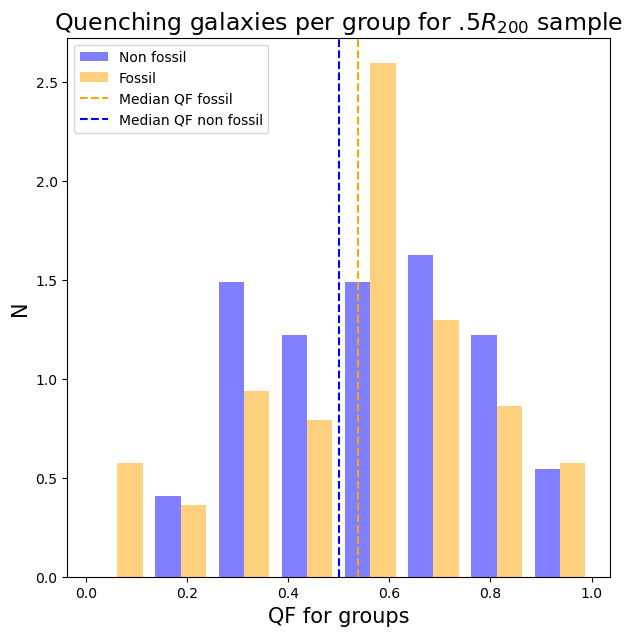

In [81]:
plt.figure(figsize=(7,7))
plt.title('Quenching galaxies per group for .5$R_{200}$ sample', fontsize=17)

plt.ylabel('N', fontsize=15)
plt.xlabel('QF for groups',fontsize=15)
plt.hist([QF_nf,QF_f], bins=bins, color = ['blue', 'orange'], rwidth=0.8, alpha=0.5, label=['Non fossil', 'Fossil'], weights = [weight_nonfossil, weight_fossil], cumulative=False, density=True)

plt.axvline(medianQF, color='orange', linestyle = '--', label='Median QF fossil')
plt.axvline(mediannQF, color='blue', linestyle = '--', label='Median QF non fossil')
plt.legend(loc='upper left', fontsize=10)

#plt.axvline(linea2, color='black')
#plt.axvline(quart21, color='black', linestyle = '--')
#plt.axvline(quart22, color='black', linestyle = '--')

plt.savefig('/home/tnguser/taller/graficosnuevos/QF05r200.jpg')

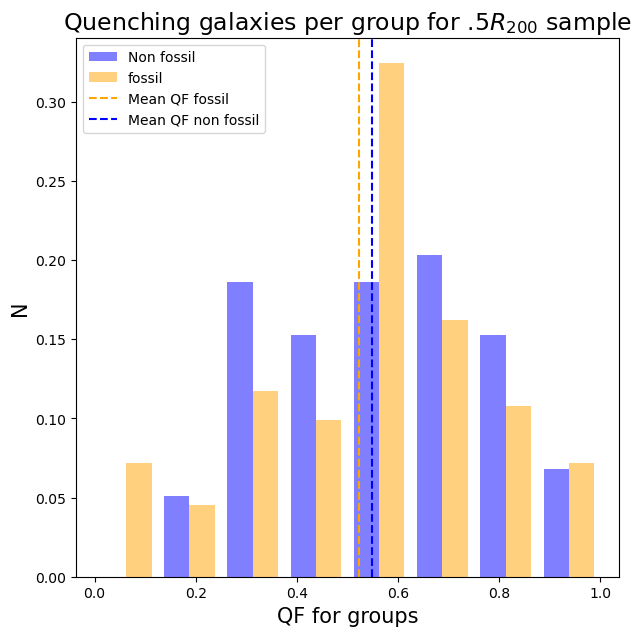

In [82]:
plt.figure(figsize=(7,7))
plt.title('Quenching galaxies per group for .5$R_{200}$ sample', fontsize=17)

plt.ylabel('N', fontsize=15)
plt.xlabel('QF for groups',fontsize=15)
plt.hist([QF_nf,QF_f], bins=bins, color = ['blue', 'orange'], rwidth=0.8, alpha=0.5, label=['Non fossil', 'fossil'], weights = [weight_nonfossil, weight_fossil])

plt.axvline(meanQF, color='orange', linestyle = '--', label='Mean QF fossil')
plt.axvline(meannQF, color='blue', linestyle = '--', label='Mean QF non fossil')
plt.legend(loc='upper left', fontsize=10)

#plt.axvline(linea2, color='black')
#plt.axvline(quart21, color='black', linestyle = '--')
#plt.axvline(quart22, color='black', linestyle = '--')

plt.savefig('/home/tnguser/taller/graficosnuevos/meanQF05r200.jpg')

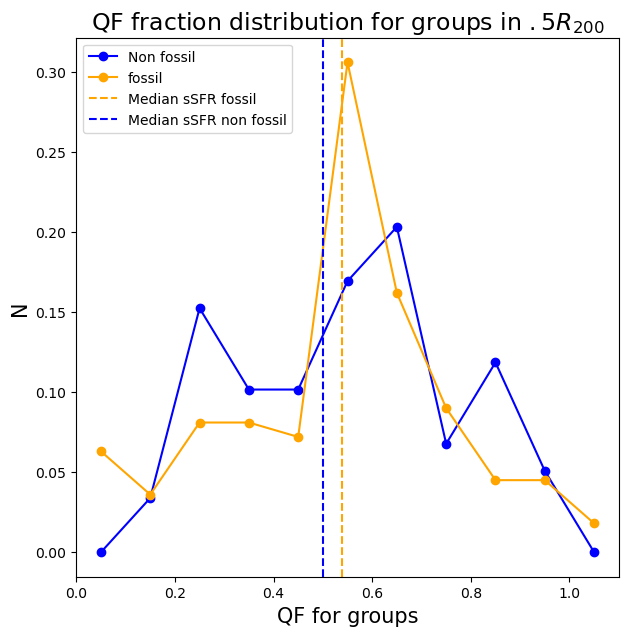

In [110]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
   
ax.set_title('QF fraction distribution for groups in $.5R_{200}$', fontsize=17)
    
ax.set_ylabel('N', fontsize=15)
ax.set_xlabel('QF for groups',fontsize=15)

n_bins = np.arange(0, 1.2, 0.1)


plot_max_points(ax, QF_nf,
                weights = weight_nonfossil,
                color ='blue', 
                label='Non fossil')

plot_max_points(ax, QF_f, 
                weights = weight_fossil,
                color = 'orange', 
                label='fossil')


#plt.hist(Nfracblue, bins=bins, color = 'blue', rwidth=0.9, alpha=0.5, label='Non fossil', density=True, stacked=True)
#plt.hist(fracblue, bins=bins, color = 'orange', rwidth=0.9, alpha=0.5, label='Fossil', density=True, stacked=True)
plt.axvline(medianQF_f, color='orange', linestyle = '--', label='Median sSFR fossil')
plt.axvline(medianQF_nf, color='blue', linestyle = '--', label='Median sSFR non fossil')
plt.legend(loc='upper left', fontsize=10)

#plt.axvline(linea2, color='black')
#plt.axvline(quart21, color='black', linestyle = '--')
#plt.axvline(quart22, color='black', linestyle = '--')

plt.savefig('/home/tnguser/taller/graficosnuevos/QF05R200.jpg')

In [83]:
bins1 = np.linspace(0, 1, num=len(QF_nf))
bins2 = np.linspace(0, 1, num=len(QF_f))

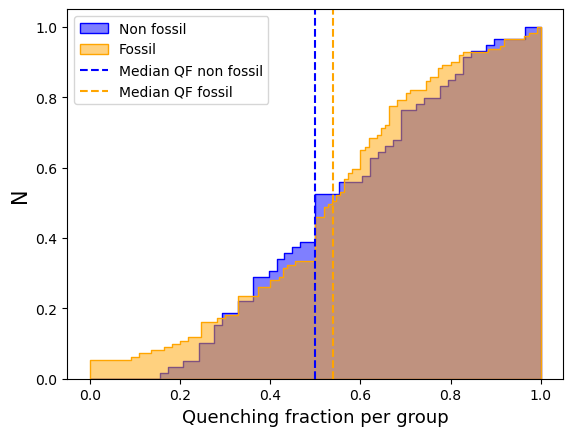

In [84]:
import seaborn as sns
# Crear un histograma con KDE
sns.histplot(QF_nf, kde=False, label='Non fossil', 
             color='blue', element='step', cumulative=True, 
             bins=bins1, stat='density', alpha=0.5)
sns.histplot(QF_f, kde=False, label='Fossil', 
             color='orange', element='step', cumulative=True, 
             bins=bins2, stat='density', alpha=0.5)


#plt.title('Quenching galaxies per group for $.5R_{200}$ sample', fontsize=17)
plt.ylabel('N', fontsize=15)
plt.xlabel('Quenching fraction per group', fontsize=13)

medianQF_nf = np.median(QF_nf)
medianQF_f = np.median(QF_f)
plt.axvline(medianQF_nf, color='blue', linestyle='--', label='Median QF non fossil')
plt.axvline(medianQF_f, color='orange', linestyle='--', label='Median QF fossil')

plt.legend(loc='upper left', fontsize=10)


plt.savefig('/home/tnguser/taller/graficosnuevos/QF05R200_KDE.jpg', dpi=300)

plt.show()

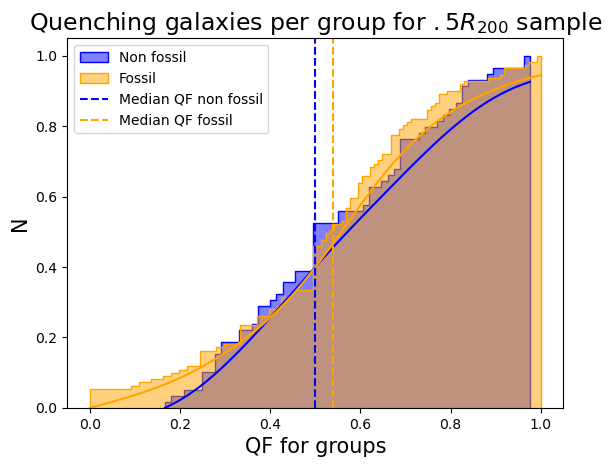

In [88]:
sns.histplot(QF_nf, kde=True, label='Non fossil', color='blue', element='step', cumulative=True, bins=(len(QF_nf)), stat='density')
sns.histplot(QF_f, kde=True, label='Fossil', color='orange', element='step', cumulative=True, bins=(len(QF_f)), stat='density')


plt.title('Quenching galaxies per group for $.5R_{200}$ sample', fontsize=17)
plt.ylabel('N', fontsize=15)
plt.xlabel('QF for groups', fontsize=15)

medianQF_nf = np.median(QF_nf)
medianQF_f = np.median(QF_f)
plt.axvline(medianQF_nf, color='blue', linestyle='--', label='Median QF non fossil')
plt.axvline(medianQF_f, color='orange', linestyle='--', label='Median QF fossil')

plt.legend(loc='upper left', fontsize=10)


plt.savefig('/home/tnguser/taller/graficosnuevos/QFsoft05.jpg', dpi=300)

plt.show()

In [86]:
from scipy.stats import kstest
from scipy.stats import ks_2samp

In [87]:
print(ks_2samp(QF_f, QF_nf))
print(ks_2samp(QF_f, QF_nf, alternative='less'))

KstestResult(statistic=0.11482669109787753, pvalue=0.63562359187067, statistic_location=0.6875, statistic_sign=1)
KstestResult(statistic=0.06596426935409987, pvalue=0.6759841027116759, statistic_location=0.5, statistic_sign=-1)
